## Wine quality prediction The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol
Output variable (based on sensory data):
12. - quality (score between 0 and 10)

#### Importing the useful libraries


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [66]:
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [68]:
df.shape

## 6490 records and 13 columns

(6497, 13)

In [69]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [71]:
## fifferentiating between categorical variable and the numerical variable
categorical_variable=[features for features in df.columns if df[features].dtype=='O']
numerical_features=[features for features in df.columns if features not in categorical_variable]

print(categorical_variable)
print(numerical_features)

['type']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Data preprocessing-
in this we will look for the null values which are present inside the datsets.

In [72]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [73]:
## filling all the null values with the mean values
features_to_be_filled_with_mean=['fixed acidity','volatile acidity','citric acid','residual sugar',
                                'chlorides','pH','sulphates']
for variable in features_to_be_filled_with_mean:
    mean=df[variable].mean()
    df[variable].fillna(mean,inplace=True)
    

In [74]:
## now checking the null values for the features
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

all the missing values are being handled by the mean imputation

## exploratory data analysis
1. plotting the boxplots to check if there are any outliers.


In [75]:
numerical_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

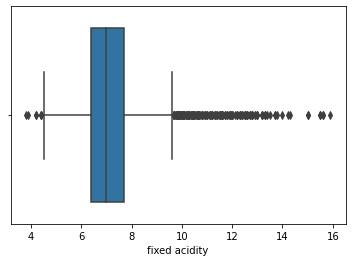

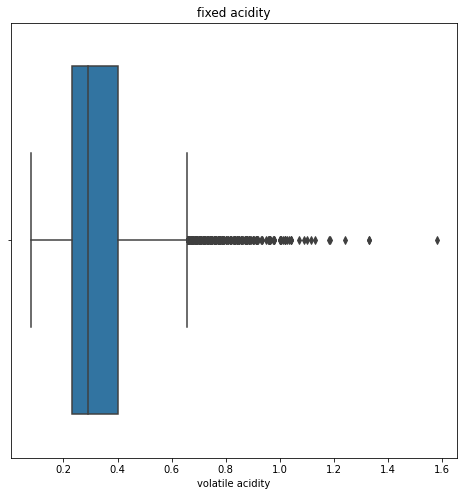

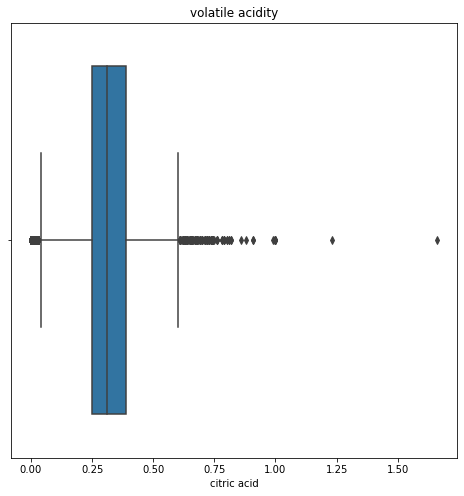

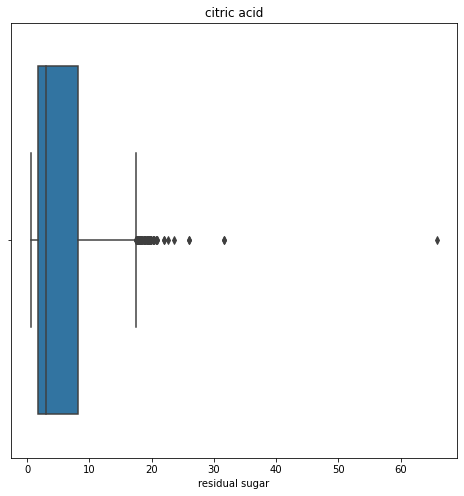

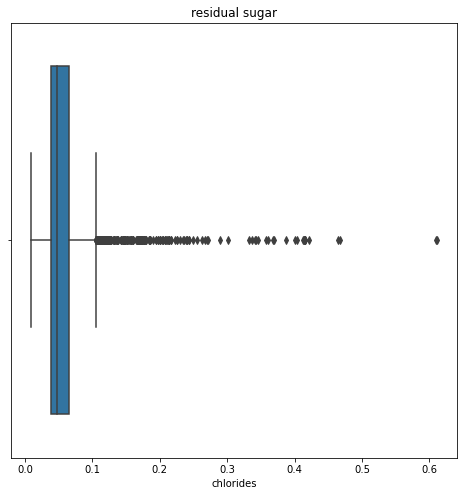

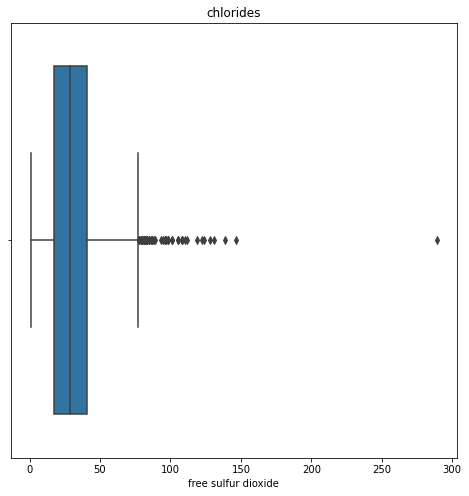

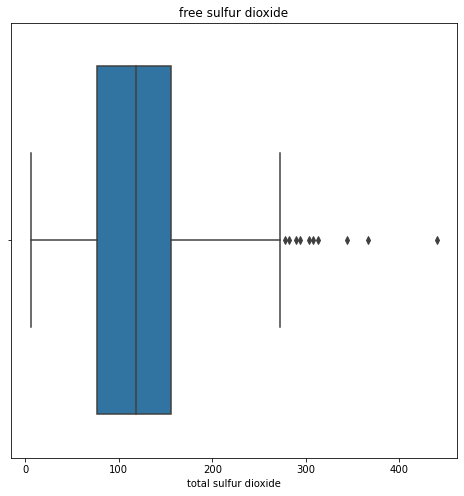

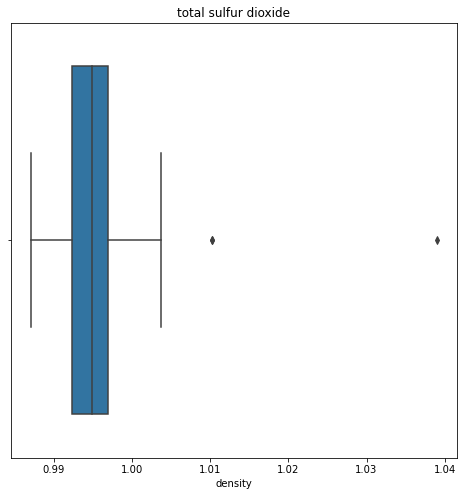

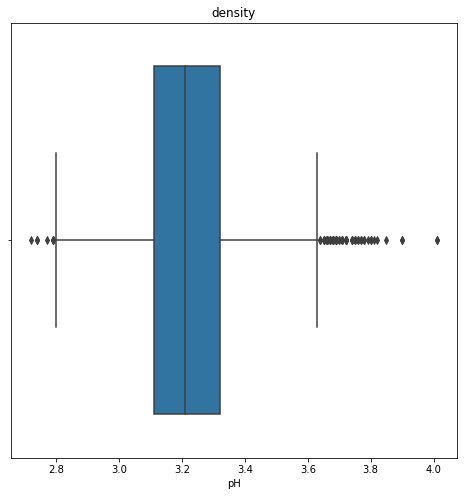

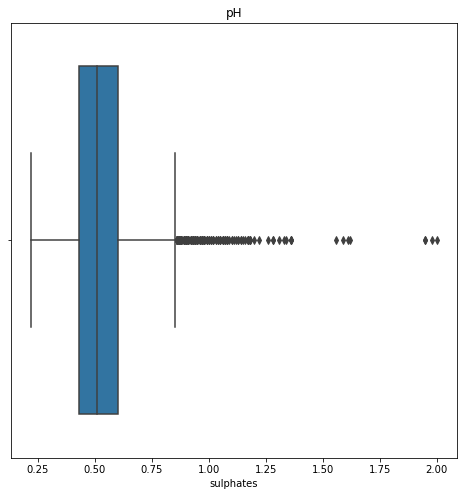

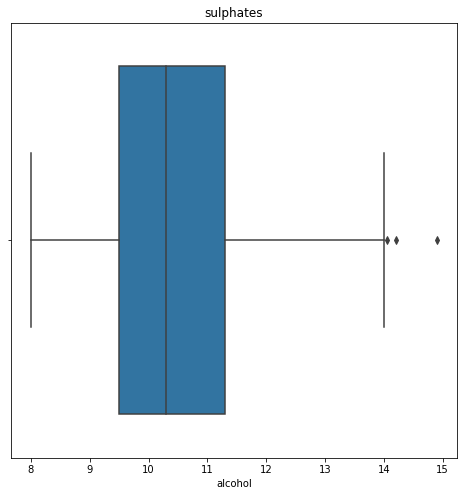

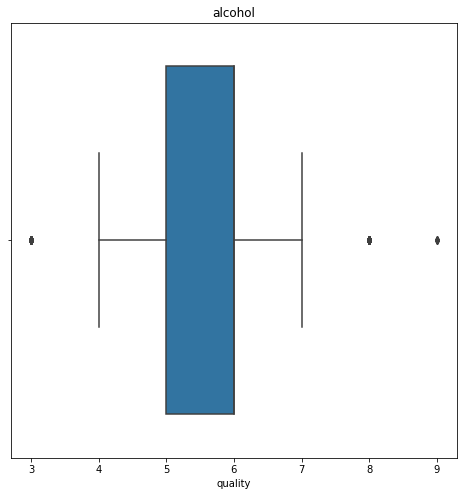

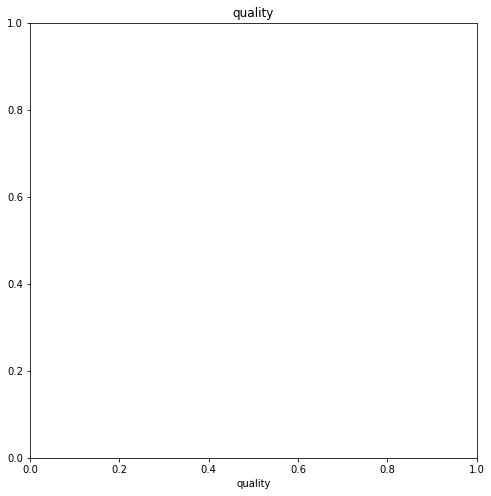

In [76]:
for features in numerical_features:
    sns.boxplot(df[features])
    plt.figure(figsize=(8,8))
    plt.xlabel(features)
    plt.title(features)

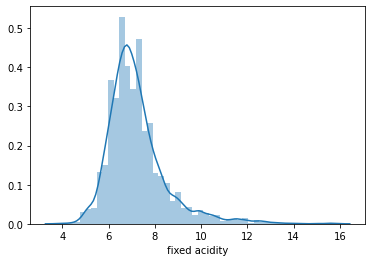

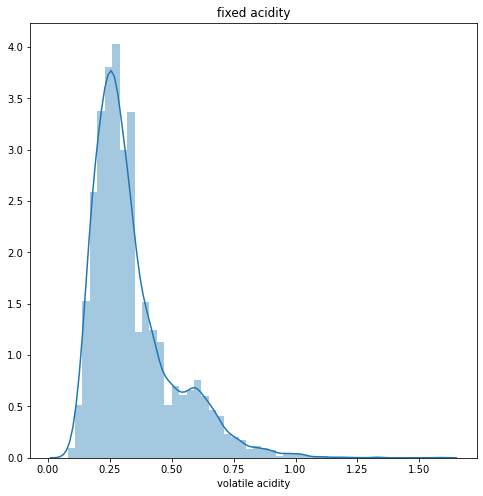

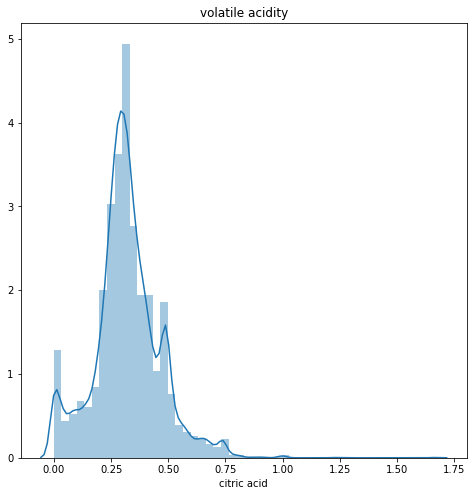

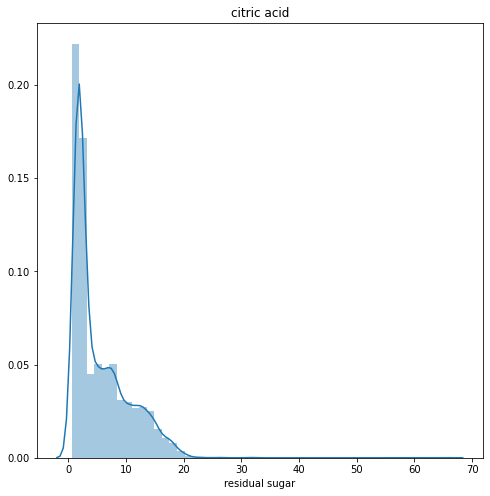

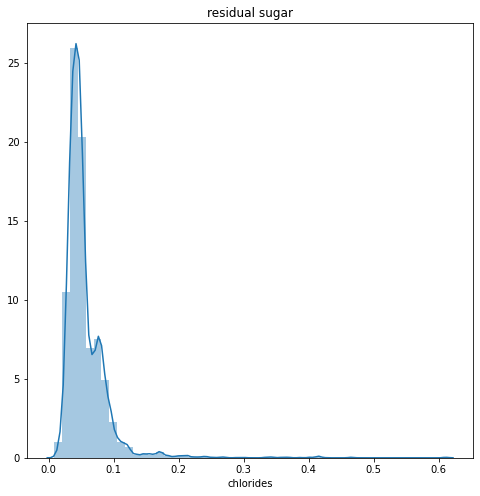

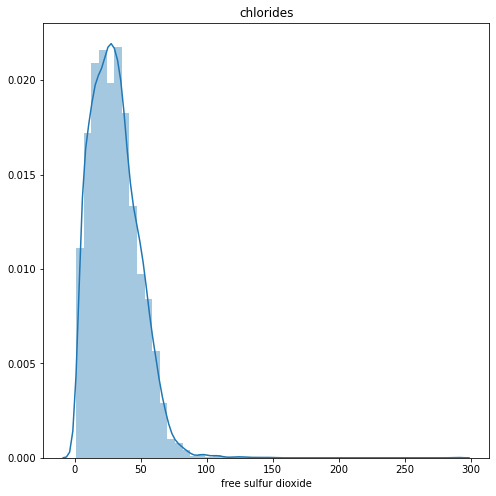

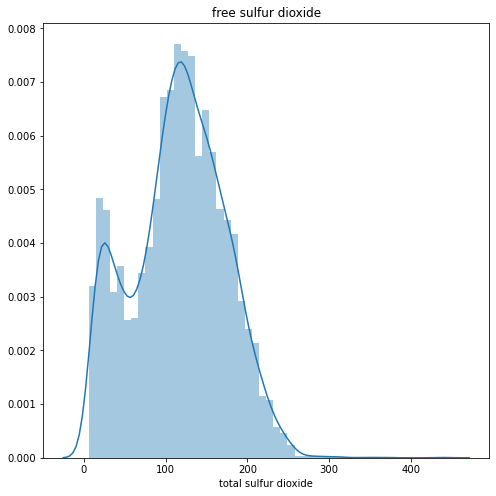

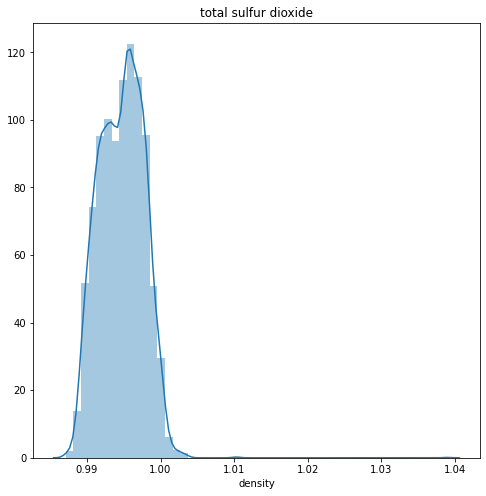

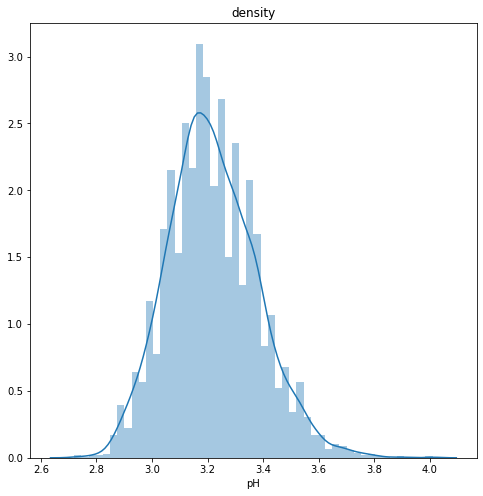

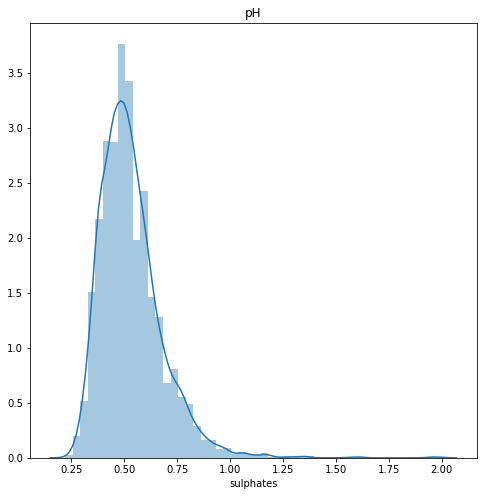

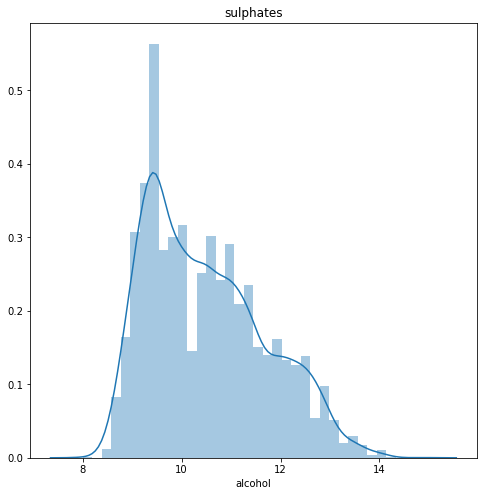

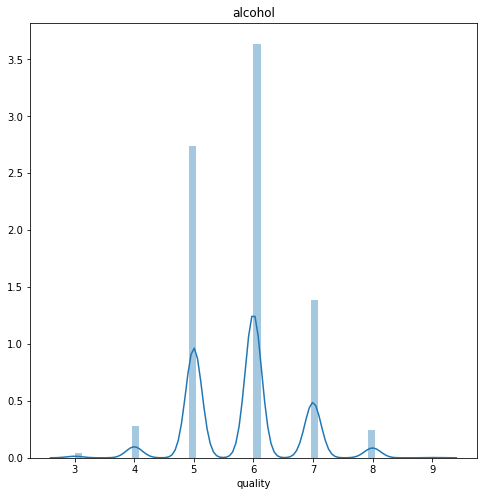

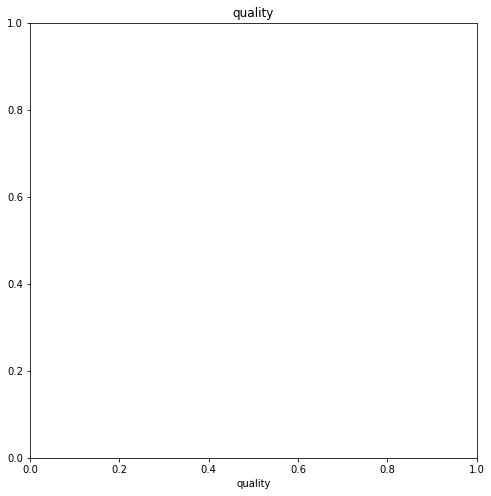

In [77]:
## creating a distribution plot
for features in numerical_features:
    sns.distplot(df[features])
    plt.figure(figsize=(8,8))
    plt.xlabel(features)
    plt.title(features)

In [78]:
## log transformation of the sulpher dioxide
df['free sulfur dioxide']=np.log(1+df['free sulfur dioxide'])

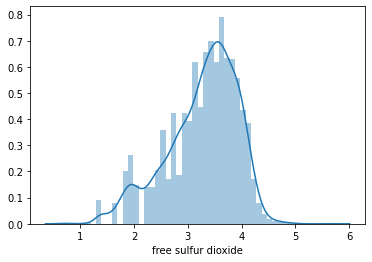

In [79]:
sns.distplot(df['free sulfur dioxide'])

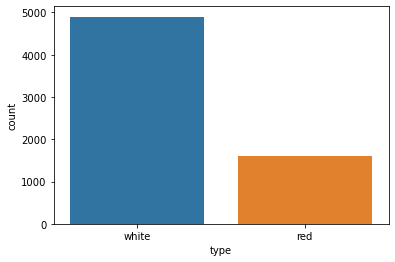

In [80]:
## checking if there is any data imbalances
sns.countplot(df['type'])


In [81]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

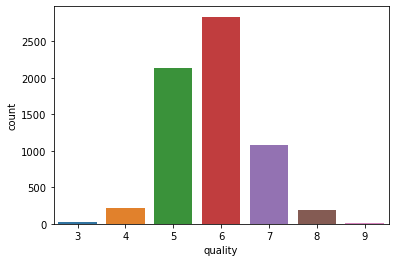

In [82]:
sns.countplot(df['quality'])

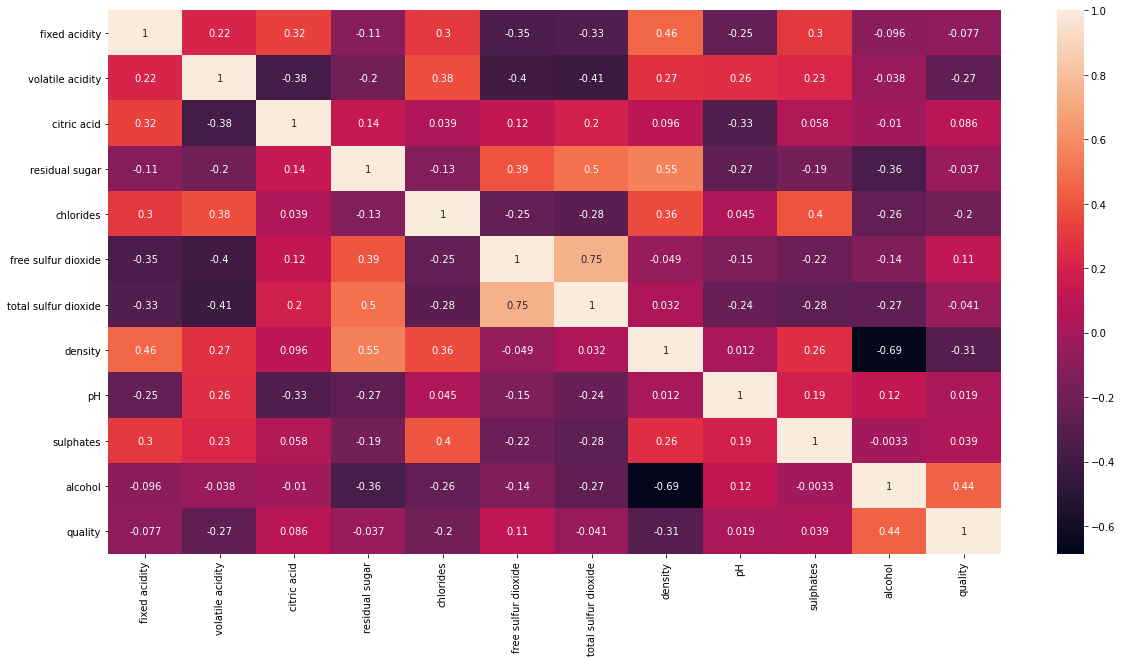

In [83]:
## corelation matrix
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

we can see that alcohol and density are highly corelated  so we can keep one of them.
also free sulphur diaoxcide and total are highly positive corelated so we can use of them.


In [84]:
## converting the type categorical features into the numerical features
df['type']=pd.get_dummies(df['type'],drop_first=True)
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,3.828641,170.0,1.001,3.0,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,2.708050,132.0,0.994,3.3,0.49,9.5,6


In [85]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,3.828641,170.0,1.001,3.0,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,2.708050,132.0,0.994,3.3,0.49,9.5,6


In [86]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [87]:
## balancing the datasets
## in this we will be using the smote technique in the over sampling module
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
## transforming the datasets
X,y=oversample.fit_resample(X,y)

In [88]:
y.value_counts()

9    2836
8    2836
7    2836
6    2836
5    2836
4    2836
3    2836
Name: quality, dtype: int64

In [89]:
## splitting the data sets into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
## using the logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [91]:
prediction=model.predict(X_test)
prediction

array([9, 8, 8, ..., 5, 8, 9], dtype=int64)

In [98]:
## calculating the accuracy score
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
score

0.0872203364428823

In [100]:
## calculating the cross validation values
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y,cv=5)
print("CV score",np.mean(score)*100)

CV score 32.575999675227266


In [101]:
## using the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
prediction=model1.predict(X_test)
prediction

array([6, 7, 8, ..., 5, 7, 9], dtype=int64)

In [103]:
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
score

0.9061737419498637

In [104]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,X,y,cv=5)
print("CV score",np.mean(score)*100)

CV score 75.18651279712424


In [110]:
def classify(model,X,y):
    model.fit(X_train,y_train)
    accuracy_score=r2_score(y_test,prediction)
    score=cross_val_score(model,X,y,cv=5)
    print("CV score",np.mean(score)*100)
    print("the accuracy score is",accuracy_score)
    

In [111]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)

CV score 82.46033871513055
the accuracy score is 0.9061737419498637


In [114]:
import xgboost as xgb
model=xgb.XGBClassifier()
classify(model,X,y)

[17:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifieraTreesClassifier()
classify(model,X,y)

CV score 83.22093743874831
the accuracy score is 0.9061737419498637


In [116]:
import pickle
## saving the model to the file
pickle.dump(model,open('modelfile.pkl','wb'))